<a href="https://colab.research.google.com/github/swatigawale/Assignment-4-simple-linear-regression-/blob/main/Assignment_4_(simple_logistic_regression_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Q 1 Delivery_time Predict delivery time using sorting time

In [ ]:
dt_st=pd.read_csv("delivery_time.csv")

In [ ]:
dt_st.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dt_st=dt_st.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [ ]:
print(dt_st)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [ ]:
dt_st.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

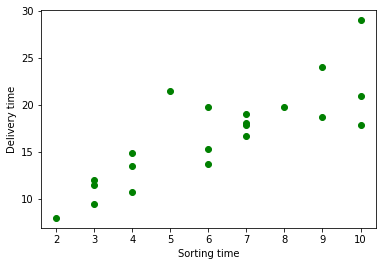

In [ ]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'boxes': [<matplotlib.lines.Line2D at 0x7fde1734da50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fde17353a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde1735ba50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fde1735b510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fde1734df50>,
  <matplotlib.lines.Line2D at 0x7fde173534d0>]}

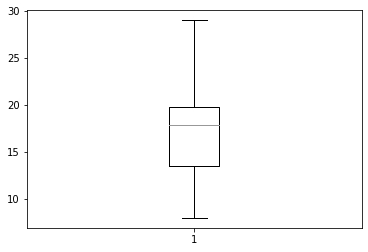

In [ ]:
plt.boxplot(dt_st.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <a list of 5 Patch objects>)

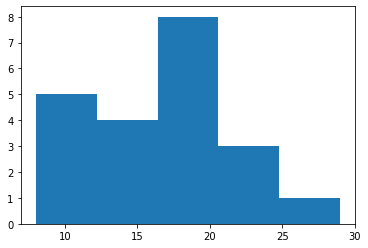

In [ ]:
plt.hist(dt_st.dt, bins=5)

In [ ]:
model2=smf.ols("dt~st",data=dt_st).fit()

In [ ]:
model2.params

Intercept    6.582734
st           1.649020
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        11:08:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3=smf.ols("dt~np.log(st)",data=dt_st).fit()

In [ ]:
model3.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.64e-06
Time:                        11:09:51   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [ ]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [ ]:
pred2 = model2.predict(dt_st) # Predicted values of dt using the model

In [ ]:
pred3 = model3.predict(dt_st) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

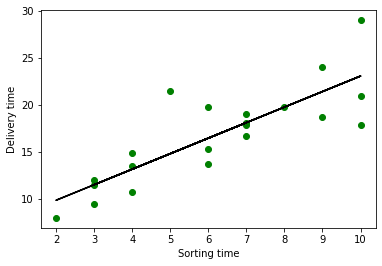

In [ ]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.plot(dt_st.st, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

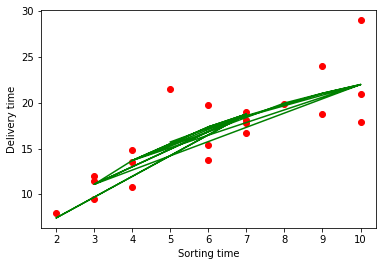

In [ ]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='red')
plt.plot(dt_st.st, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Model 3 is slightly better than Model 2 and has moderate correlation

Q 2Salary_hike -Build a prediction model for Salary_hike

In [ ]:
sal_hike=pd.read_csv("Salary_Data.csv")

In [ ]:
sal_hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
sal_hike.shape

(30, 2)

In [ ]:
sal_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fddfde2c3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fddfde323d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fddfde39410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fddfde32e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fddfde2c910>,
  <matplotlib.lines.Line2D at 0x7fddfde2ce50>]}

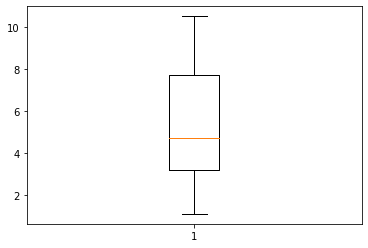

In [ ]:
plt.boxplot(sal_hike.YearsExperience)

{'boxes': [<matplotlib.lines.Line2D at 0x7fddfde145d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fddfde19590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fddfdda25d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fddfdda2090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fddfde14ad0>,
  <matplotlib.lines.Line2D at 0x7fddfde19050>]}

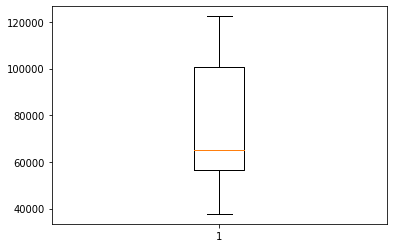

In [ ]:
plt.boxplot(sal_hike.Salary)

In [ ]:
sal_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


(array([3., 1., 1., 1., 5., 2., 3., 1., 0., 0., 2., 0., 1., 1., 1., 1., 2.,
        2., 1., 2.]),
 array([ 37731.,  41964.,  46197.,  50430.,  54663.,  58896.,  63129.,
         67362.,  71595.,  75828.,  80061.,  84294.,  88527.,  92760.,
         96993., 101226., 105459., 109692., 113925., 118158., 122391.]),
 <a list of 20 Patch objects>)

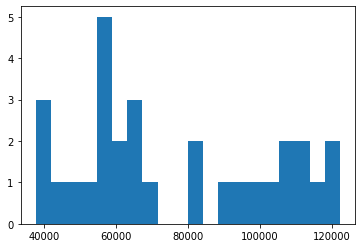

In [ ]:
plt.hist(sal_hike.Salary, bins=20)

Text(0, 0.5, 'Salary')

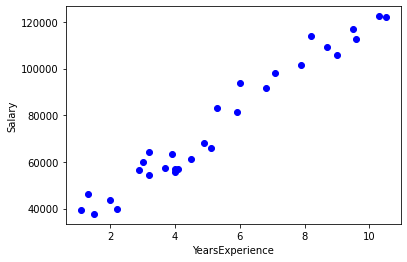

In [ ]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [ ]:
model6=smf.ols("Salary~YearsExperience",data=sal_hike).fit()

In [ ]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        11:26:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model7=smf.ols("Salary~np.log(YearsExperience)",data=sal_hike).fit()

In [ ]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.25e-13
Time:                        11:26:47   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model8=smf.ols("Salary~np.exp(YearsExperience)",data=sal_hike).fit()

In [ ]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.72e-05
Time:                        11:27:18   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model6.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
model7.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [ ]:
model6.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [ ]:
pred6 = model6.predict(sal_hike) # Predicted values of Salary using the model

Text(0, 0.5, 'Salary')

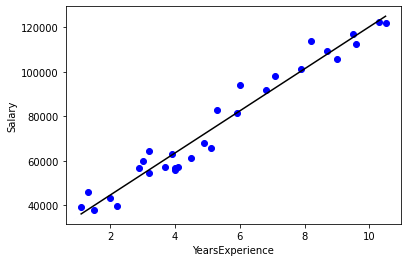

In [ ]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.plot(sal_hike.YearsExperience, pred6,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [ ]:
pred7 = model7.predict(sal_hike) # Predicted values of Salary using the model

Text(0, 0.5, 'Salary')

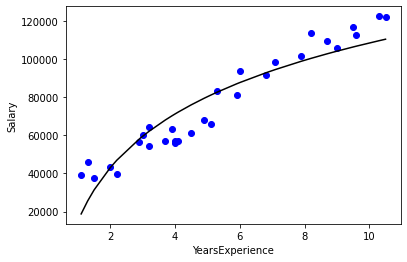

In [ ]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.plot(sal_hike.YearsExperience, pred7,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

Model6 is better than Model7.